In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("SalesData.csv")

### 1. Compare Sales by region for 2016 with 2015 using bar chart

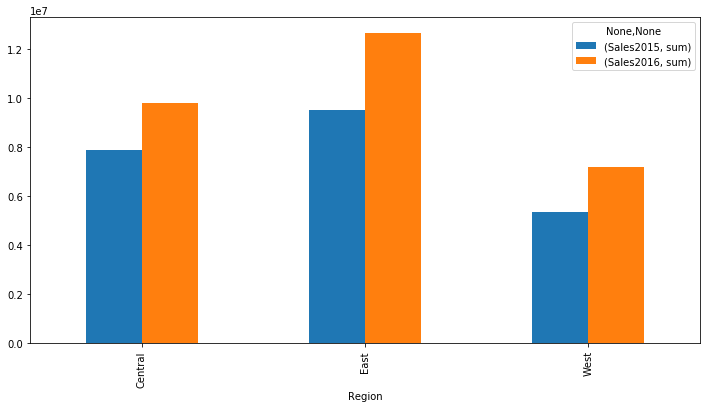

In [3]:

sales1 = sales.groupby(['Region']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [14]:
sales2 = sales.groupby(['Region']).aggregate({'Sales2016':['sum']})
sales2
 

,Sales2016
,sum
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


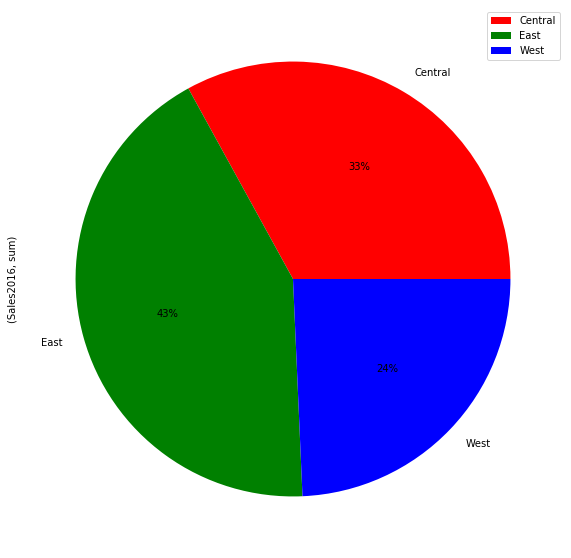

In [18]:
sales2.plot(kind='pie', 
            labels=['Central','East','West'], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10,
            figsize = (10,10),
            subplots='true')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [21]:
sales3 = sales.groupby(['Region','Tier']).aggregate({'Sales2016':['sum'], 'Sales2015':['sum']})

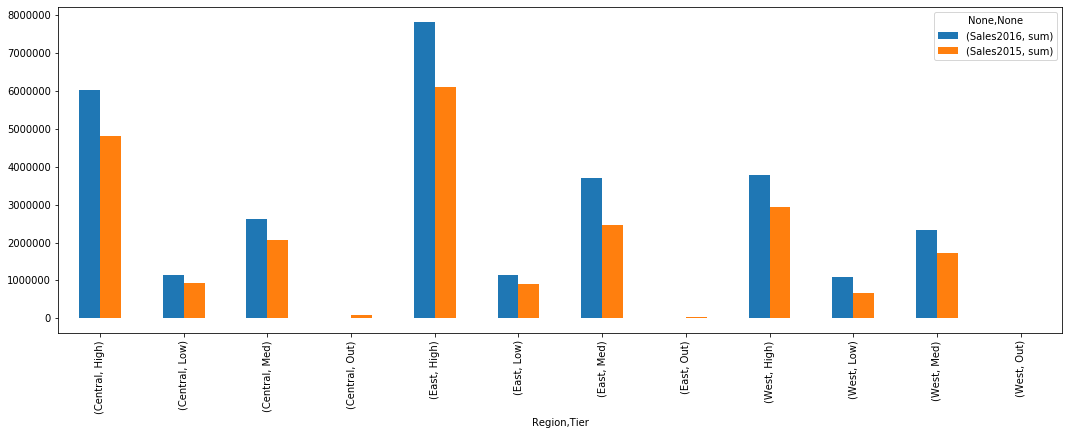

In [22]:
sales3graph=sales3.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

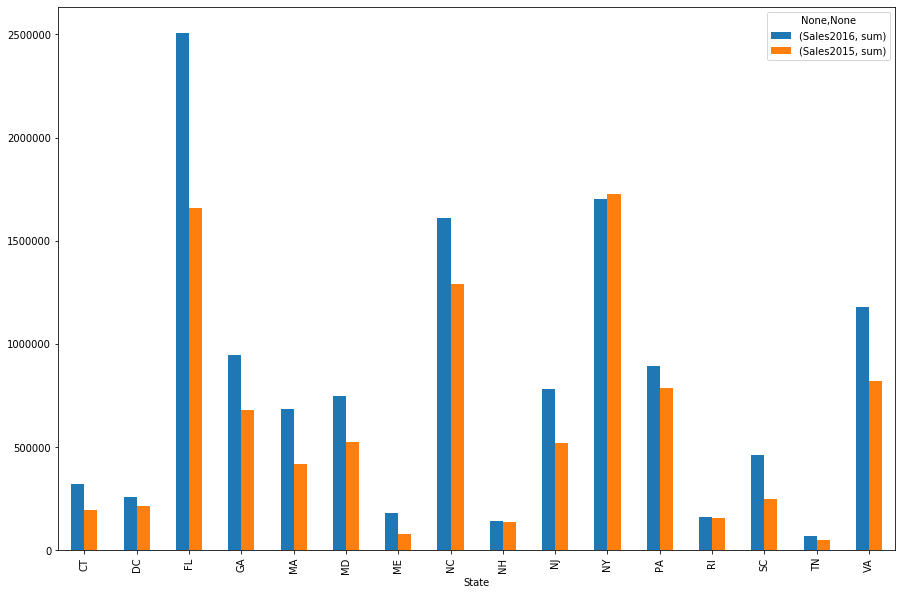

In [32]:
EastRegion = sales.loc[(sales.Region == "East")]
Eastgroup = EastRegion.groupby(['State']).agg({'Sales2016':['sum'], 'Sales2015':['sum']})
EastBar = Eastgroup.plot(kind = 'bar', figsize = (15,10))

We can see only NY had a drop from 2015 to 2016

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

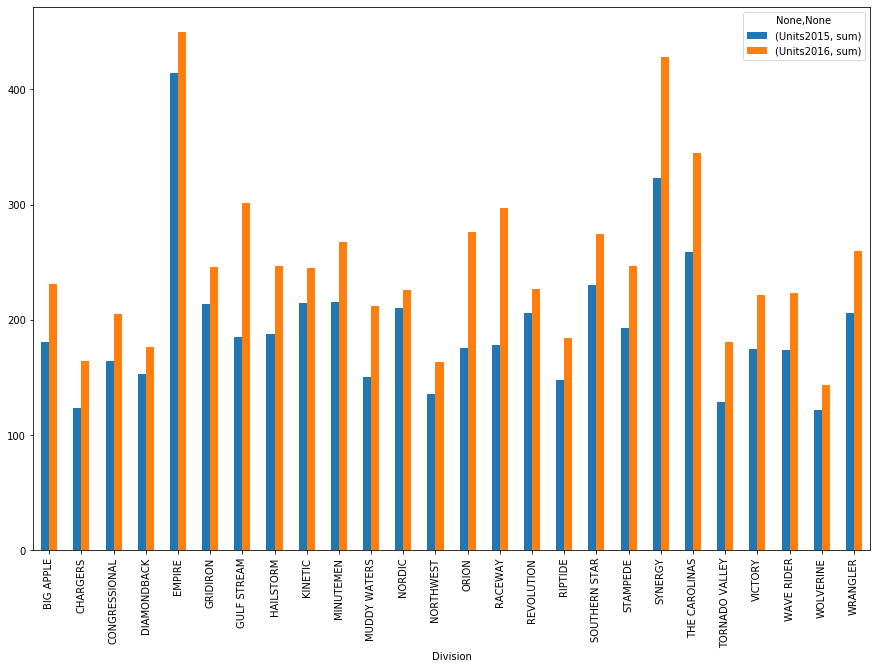

In [38]:
highTier = sales.loc[(sales.Tier == "High")]
highTierGroup = highTier.groupby('Division').agg({'Units2015':['sum'], 'Units2016':['sum']})
highTierGroup.plot(kind= 'bar', figsize = (15,10))

No division saw a decline in units sold in 2016 as compared to units sold in 2015

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [4]:
sales['Qtr'] = np.where((sales['Month']=='Jan') |(sales['Month']=='Feb') | (sales['Month']=='Mar'),'Q1',
                       np.where((sales['Month']=='Apr') |(sales['Month']=='May') | (sales['Month']=='Jun'), 'Q2',
                       np.where((sales['Month']=='Jul') |(sales['Month']=='Aug') | (sales['Month']=='Sep'), 'Q3', 'Q4')))

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


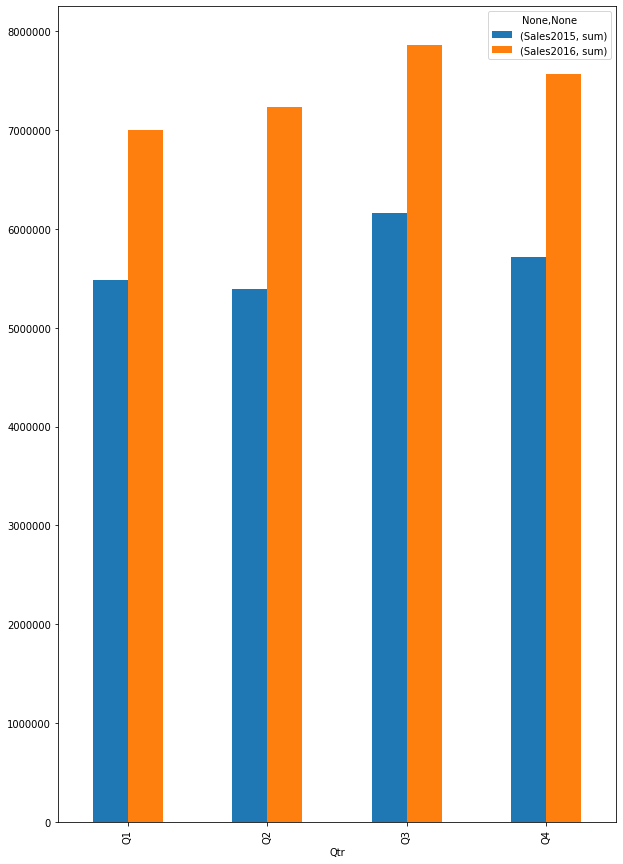

In [5]:
qtrwise = sales.groupby('Qtr').agg({'Sales2015':['sum'], 'Sales2016':['sum']})
qtrwise.plot(kind = 'bar', figsize = (10,15))

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

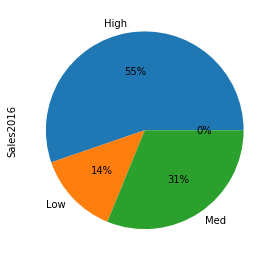

In [35]:
Q1Sales = sales.loc[(sales.Qtr == 'Q1')]
Q1SalesData = Q1Sales.groupby('Tier').Sales2016.sum()
Q1SalesData.plot(kind = 'pie', autopct = '%1.0f%%', subplots='true',
                        layout=(2,2), figsize= (10,10) )
plt.show()


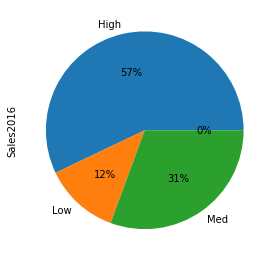

In [37]:
Q2Sales = sales.loc[(sales.Qtr == 'Q2')]
Q2SalesData = Q2Sales.groupby('Tier').Sales2016.sum()
Q2SalesData.plot(kind = 'pie', autopct = '%1.0f%%', subplots='true',
                        layout=(2,2), figsize= (10,10) )
plt.show()


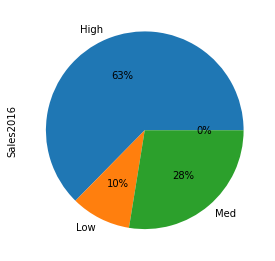

In [43]:
Q3Sales = sales.loc[(sales.Qtr == 'Q4')]
Q3SalesData = Q3Sales.groupby('Tier').Sales2016.sum()
Q3SalesData.plot(kind = 'pie', autopct = '%1.0f%%', subplots='true',
                        layout=(2,2), figsize= (10,10) )
plt.show()